<a href="https://colab.research.google.com/github/thual/ASID-ensR30R10/blob/main/TDensR30R10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ensemble method for a R30R10 artificial function


We build a artifical observation operation $\underline y = {\cal G}(\underline x)$ from the control space $\underline x \in \mathbb R^N$ to the observation space $\underline y \in \mathbb R^M$. We set ${\cal G} = ({\cal G}_1, ...,{\cal G}_M)^T$ such that:
$$
{\cal G}_i(\underline x ) = \left[\underline x-10*\sin(i)\, \underline e_i\right]^2 \;, 
$$
where $(\underline e_1, ..., \underline e_N)$ is the canonical basis.

We choose  $\underline x^t=\sum_{j=1}^N \underline e_j$ as the true state,  $\underline{\underline B} =
\sigma_b^2\; \underline{\underline I}$ and  $\underline{\underline R} =\sigma_r^2 \;\underline{\underline B}$ as the background and observation errors covariance matrices. 

Typical values are $N=30$, $M=10$, $\sigma_b=0.1$ and $\sigma_r =1$. 




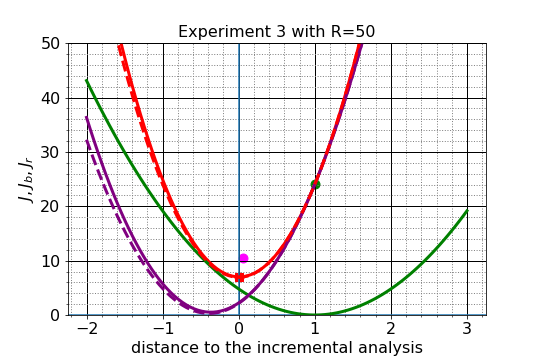

The analysis $x^a$ is the state that minimizes the cost function $J(\underline x) = J_b(\underline x) + J_r(\underline x)$ where $$ J_b(\underline x) = {1\over 2} (\underline x- \underline x^b)^T \;\underline{\underline B}^{-1}\; (\underline x- \underline x^b)\;,\quad  J_r(\underline x) = {1\over 2} \left[\underline y^o- {\cal G}(\underline x)\right]^T \;\underline{\underline R}^{-1}\; \left[\underline y^o- {\cal G}(\underline x)\right].$$



The cost function is approximated here by the incremental cost function $J_{inc}(\underline x) = J_b(\underline x) + J_{rinc}(\underline x)$ whith:
$$ J_{rinc}\left(\underline x^b + \delta \underline x\right) = {1\over 2} \left(\underline d- \underline{\underline G} \delta \underline  x \right)\;\underline{\underline R}^{-1}\; \left(\underline d- \underline{\underline G} \delta \underline  x \right)\,$$
where $\underline d = \underline y^0 - {\cal G}(\underline x^b)$ is the innovation vector and $\underline{\underline G}$ the Jacobian matrix of ${\cal G}$ at $\underline x^b$. 



Two methods are considered to compute the incremental analysis $\underline {\widetilde x}_a = \underline x_b  + \underline{\underline K} \;\underline d$:


*   The gain matrix is computed as $\underline{\underline K}  = \underline{\underline B} \, \underline{\underline G}^T\, ( \underline{\underline G}\,   \underline{\underline B}\,  \underline{\underline G}^T + \underline{\underline R})^{-1}$.
*  The gain matrix is computed with an ensemble method with the approximations $\underline{\underline B} \, \underline{\underline G}^T = \underline{\underline{\cal A}}^{BG^T}$ et 
$\underline{\underline G}\,   \underline{\underline B}\,  \underline{\underline G}^T= \underline{\underline{\cal A}}^{GBG^T}$ with 

\begin{eqnarray} \underline{\underline{\cal A}}^{BG^T}&=& {1\over R} \sum_{r=1}^R \left( \underline x^{(r)} - \underline x^b \right) \left(\underline y^{(r)} - \underline y^b \right)^T  \;, 
\cr 
 \underline{\underline{\cal A}}^{GBG^T} &=&{1\over R} \sum_{r=1}^R \left( \underline y^{(r)} - \underline y^b \right) \left(\underline y^{(r)} - \underline y^b \right)^T \;,
\end{eqnarray}
where the $\underline x^{(r)}$ are gaussian random samples of mean $\underline{x}^b$ and covariance $\underline{\underline B}$, and $\underline y^{(r)}= {\cal G} (\underline x^{(r)})$. 


Plot of $J_{inc}$, $J_b$ and $J_{r,inc}$  as a function of $z$ for $\underline x= \underline x^a + z \, (\underline x^a - \underline x^b)$ are presented.


**References:**

*   O. Thual, "[Introduction to Data Assimilation for Scientists and Engineers](http://pedagotech.inp-toulouse.fr/130202/co/module_idase.html)", Open Learn. Res. Ed. INP 0202 (2013) 6h


# Compilation of the subroutines

Execute first the code below to define the functions!

In [ ]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
     
def inifig(xdim=7.5,ydim=5):
    # Standard figure initialization with grids
    plt.figure(figsize=(xdim,ydim))
    plt.grid(color='black', axis='y', linestyle='-', linewidth=1)        
    plt.grid(color='black', axis='x', linestyle='-', linewidth=1)        
    plt.minorticks_on()
    plt.grid(which='minor',color='grey', axis='x', linestyle=':', linewidth=1)        
    plt.grid(which='minor',color='grey', axis='y', linestyle=':', linewidth=1)        
    #plt.axhline(0); plt.axvline(0)
    plt.xticks(fontsize=16); plt.yticks(fontsize=16)    
    
def cG_nol(x):
    # Nonlinear observation operator
    y=np.zeros(M)
    for i in range(M):
        xi=xis[:,i].reshape(N,1)
        y[i]=(x-xi).T@(x-xi)
    return y.reshape(M,1)

def G_lin(x):
    # Linearized observation operator
    Gp=np.zeros((M,N))
    for i in range(M):
        xi=xis[:,i].reshape(N,1)
        Gp[i,:]=2*(x-xi).T
    return Gp
    
def Scat(x,y,col):
    d=np.linalg.norm(x-xt);sd=s*d;
    xs=np.zeros([N,Ns]); 
    cGs=np.zeros([M,Ns]);
    for l in range(Ns):
        xsl=xt+s[l]*(x-xt); 
        cGsl=cG_nol(xsl)
        xs[:,l]=xsl.T; cGs[:,l]=cGsl.T;
        cGs[:,l]=cG_nol(xs[:,l].reshape(N,1)).reshape(M)
    cG0=y[0]; cG1=y[1]; cG2=y[2]
    cGs0=cGs[0,:]; cGs1=cGs[1,:]; cGs2=cGs[2,:]; 
    plt.scatter(d,cG0,marker='o',color=col,s=10)
    plt.scatter(d,cG1,marker='o',color=col,s=20)
    plt.scatter(d,cG2,marker='o',color=col,s=30)
    plt.plot(sd,cGs0,color=col,linewidth=1)
    plt.plot(sd,cGs1,color=col,linewidth=1)
    plt.plot(sd,cGs2,color=col,linewidth=1)

def Jb_cost(x):
    # Background part of the cost function 
    dx=x-xb
    Jb=.5*dx.T@uuBi@dx
    return Jb
 
def Jr_cost(x):
    # Observation part of the cost function 
    dy=yo-cG_nol(x)
    Jr=.5*dy.T@uuRi@dy
    return Jr

def J_cost(x):
    # Cost function
    J=Jb_cost(x)+Jr_cost(x)
    return J

def Jrinc_cost(x):
    # Observation part of the incremental cost function 
    d=yo-cG_nol(xb); dx=x-xb
    dy=d-G@dx
    Jrinc=.5*dy.T@uuRi@dy
    return Jrinc

def Jinc_cost(x):
    # Incremental cost function
    return Jb_cost(x)+Jrinc_cost(x)

# Sample experiments

Colors : Blue for the true state, Black for the background and its ensemble perturbations, Red for the incremental analysis and Magenta for its approximation with the ensemble method.

The following parameters can be modified:  

*   `N`: The dimension of the control space
*   `M`: The dimension of the observation space
*   `sigb`: The standard deviation for the background errors
*   `sigr`: The standard deviation for the observation errors
*   `R`: Number of ensemble members
*   `Iexp`: Number of experiment to plot
*   `Nblack`: Number of black curves 



Number of ensemble experiments: 50 

===== Experiment 1 with R=50 =======
Close figure to continue


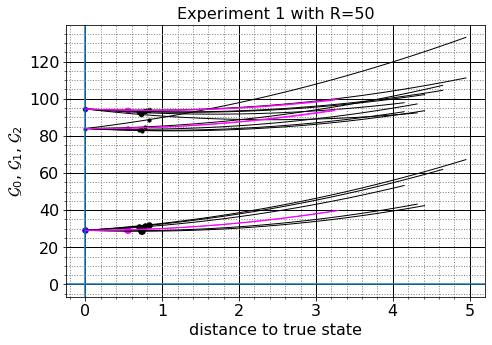

===== Experiment 1 with R=50 =======
Close figure to continue


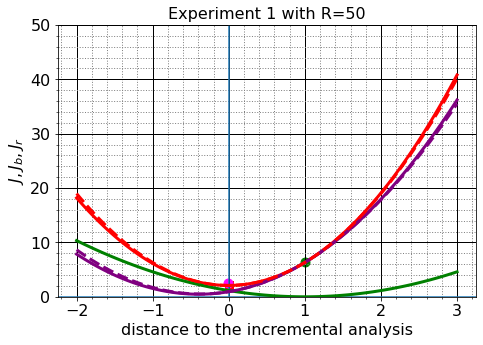

===== Experiment 2 with R=50 =======
Close figure to continue


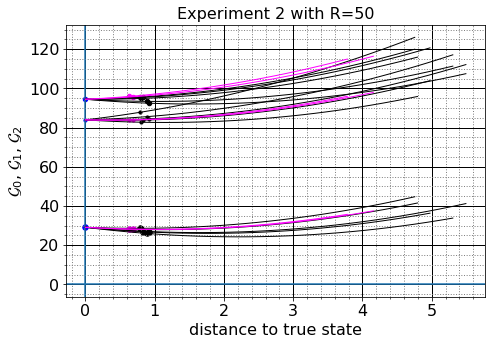

===== Experiment 2 with R=50 =======
Close figure to continue


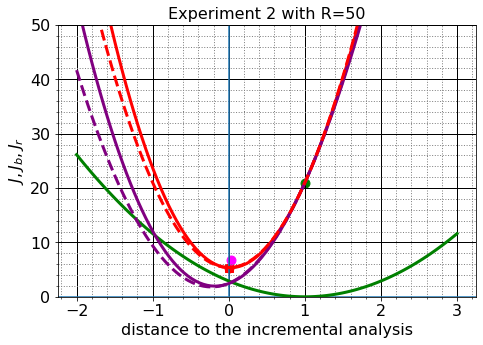

===== Experiment 3 with R=50 =======
Close figure to continue


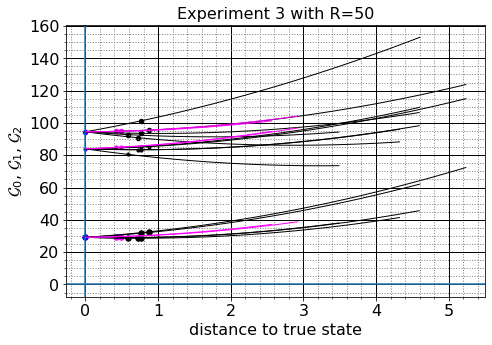

===== Experiment 3 with R=50 =======
Close figure to continue


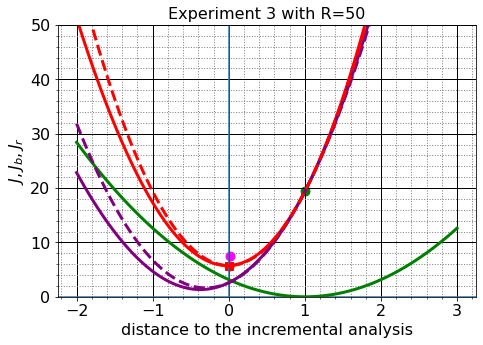

===== Experiment 4 with R=50 =======
Close figure to continue


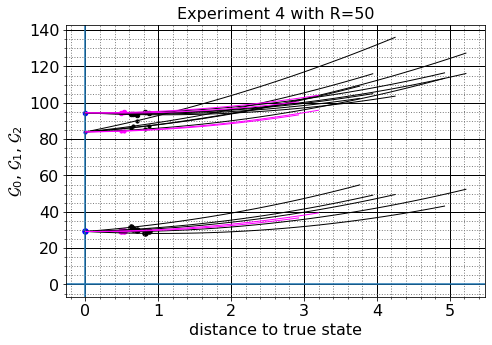

===== Experiment 4 with R=50 =======
Close figure to continue


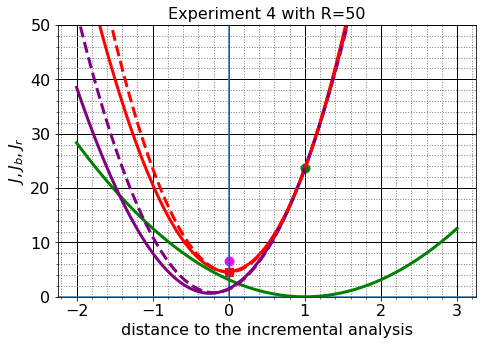

===== Experiment 5 with R=50 =======
Close figure to continue


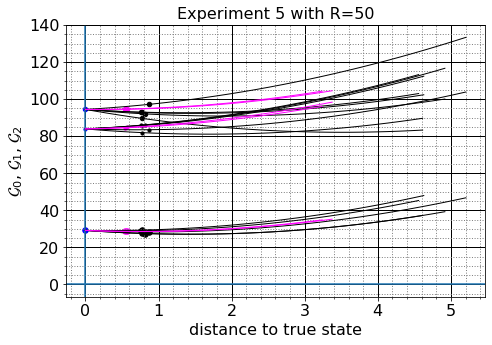

===== Experiment 5 with R=50 =======
Close figure to continue


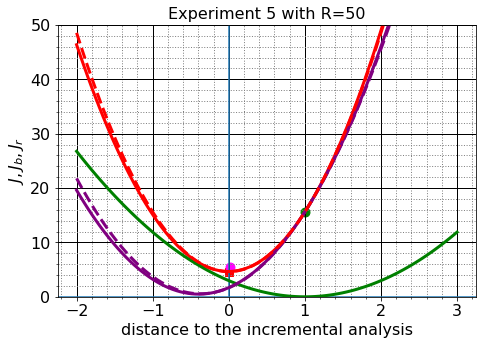

===== Experiment 6 with R=50 =======
Close figure to continue


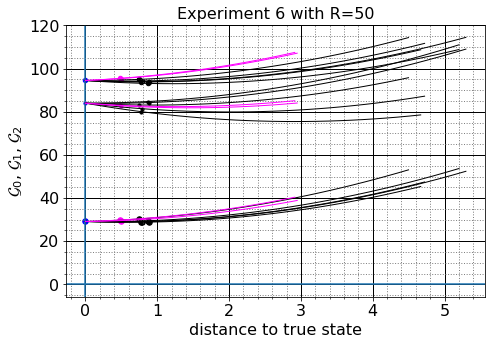

===== Experiment 6 with R=50 =======
Close figure to continue


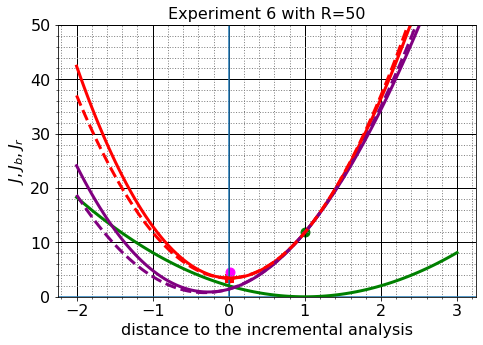

===== Experiment 7 with R=50 =======
Close figure to continue


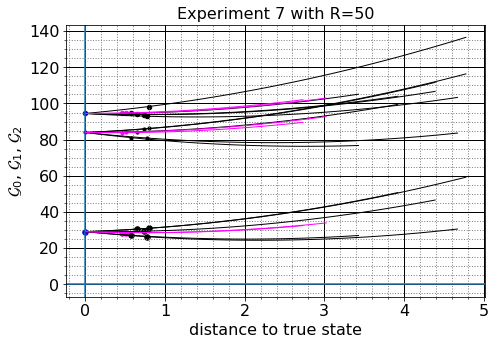

===== Experiment 7 with R=50 =======
Close figure to continue


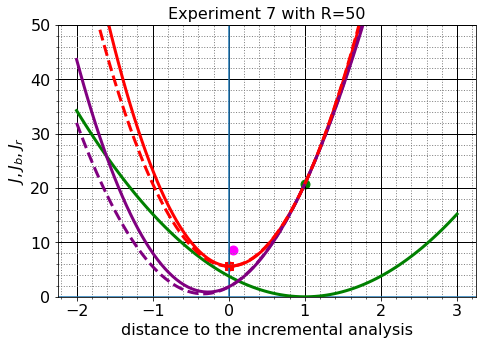

===== Experiment 8 with R=50 =======
Close figure to continue


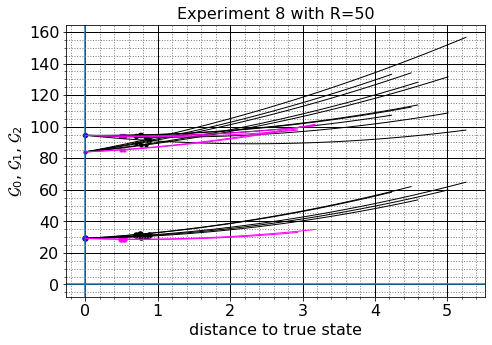

===== Experiment 8 with R=50 =======
Close figure to continue


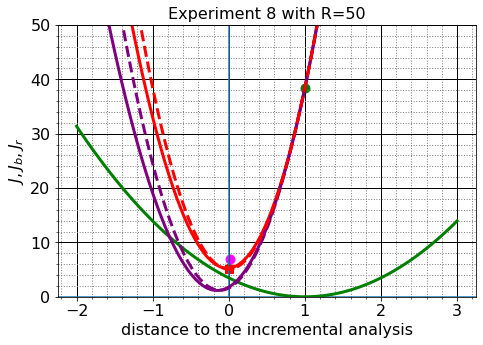

===== Experiment 9 with R=50 =======
Close figure to continue


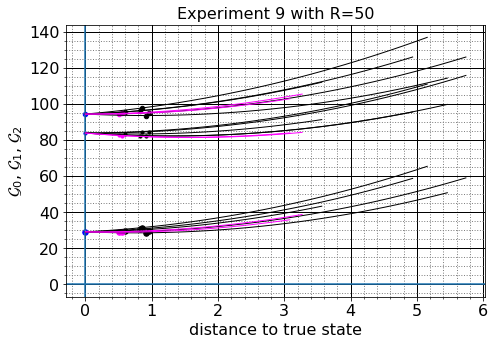

===== Experiment 9 with R=50 =======
Close figure to continue


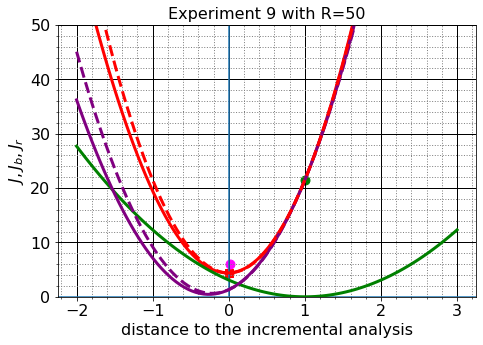

In [ ]:
# Parameters to change
N=30; M=10 # Dimensions of the control and observation spaces
sigb=.1; # Background standard deviationsr
sigr=1; # Measurment standard deviation 
R=50 # Number of ensemble experiments
Iexp=9 # Number of graphics to plot
Nblack=5 # Number of plotted curves out of the R-ensemble
ext=".png" # Figure format ".png" or ".pdf"

# Other parameters 
Nz=100; z=np.linspace(-2,3,Nz)  # coordinate for the cost function plots
Ns=30; s=np.linspace(0,6,Ns) # coordinate for the observation operator plots

# Derived parameters
uuB=sigb**2*np.eye(N,N); # Background covariance error matix
uuBi=(1/sigb**2)*np.eye(N,N); # Inverse of B
uuR=sigr**2*np.eye(M,M); # Observation covariance error matix
uuRi=(1/sigr**2)*np.eye(M,M); # Inverse of R

# Columm vectors sinus for the observation operator
xis=np.zeros((N,M));
Is=min(M,N)
for i in range(Is):
    xis[i,i]=10*np.sin(i+1)  

# True state
xt=np.ones(N).reshape(N,1)
yt=cG_nol(xt).reshape(M,1) 
    
print('Number of ensemble experiments:',R,"\n")


# Perform Iexp experiments with ensemble method
for i in range(1,Iexp+1):
    
    # Generation of the background
    xb=xt+np.random.normal(0,sigb,N).reshape(N,1)
    yb=cG_nol(xb).reshape(M,1)
    #xbR=np.tile(xb,(R,1)).T
    #ybR=np.tile(yb,(R,1)).T
    # Generation of the measurements
    yo=yt+np.random.normal(0,sigr,M).reshape(M,1)
    d=yo-cG_nol(xb)
   
    # Initialization of the figure Scat
    inifig()
    print("===== Experiment "+str(i)+" with R="+str(R)+" =======")
    plt.title("Experiment "+str(i)+" with R="+str(R),fontsize=16)
    plt.xlabel('distance to true state',fontsize=16 )
    plt.ylabel(r'${\cal G}_0$, ${\cal G}_1$, ${\cal G}_2$',fontsize=16)
    plt.axhline(0); plt.axvline(0)
    #plt.ylim(0,40) 
               
    
    # Generation of an ensemble of R members around the background
    xr=xb+np.random.normal(0,sigb,(N,R))
    
    # Computation of the R set of observations
    yr=np.zeros((M,R))
    for r in range(R):
        xrv=xr[:,r].reshape(N,1)
        yrv=cG_nol(xrv).reshape(M,1)
        yr[:,r]=yrv.T
     
    # Plot of true state
    Scat(xt,yt,"blue")
   
    
    # Plot of Nblack curves out of the R-ensemble
    for r in range(0,R,R//Nblack):
        # Ensemble of trajectories around background
        xrv=xr[:,r].reshape(N,1)
        yrv=yr[:,r].reshape(M,1)
        Scat(xrv,yrv,"black")
        
    # Ensemble incremental method
    
    ## Computation of the analysis with the ensemble method
    BGT=(1/R)*((xr-xb)@(yr-yb).T)
    GBGT=(1/R)*((yr-yb)@(yr-yb).T)
    K=BGT@np.linalg.inv(GBGT+uuR)                
    xae=xb+K@d
    yae=cG_nol(xae)
    Scat(xae,yae,"magenta")

     
    # Incremental method with G_lin
    
    ## Computation of the analysis with the incremental method
    #B=(1/R)*((xr-xb)@(xr-xb).T) # Replace B by the ensemble B
    G=G_lin(xb); # Linearized observation operator
    K=uuB@G.T@np.linalg.inv(G@uuB@G.T+uuR)
    xai=xb+K@d
    yai=cG_nol(xai)
    
    ## Plot of the analysis computed with the ensemble method
    dai=np.linalg.norm(xai-xt)
    Scat(xai,yai,"magenta")

        
    # Save the figure Scat
    plt.savefig('GR30R10-'+str(i)+ext)
    print("Close figure to continue")
    plt.show(); plt.close()
    
    # Initialization of the figure Jcost
    inifig()
    print("===== Experiment "+str(i)+" with R="+str(R)+" =======")
    plt.title("Experiment "+str(i)+" with R="+str(R),fontsize=16)
    plt.xlabel('distance to the incremental analysis',fontsize=16 )
    plt.ylabel(r'$J, J_b, J_r$',fontsize=16)
    plt.axhline(0); plt.axvline(0)
    plt.ylim(0,50) 

    # Plot cost function
    J=np.zeros(Nz)
    Jb=np.zeros(Nz)
    Jr=np.zeros(Nz)
    Jrinc=np.zeros(Nz)
    Jinc=np.zeros(Nz)
    for l in range(Nz):
        xz=xai+z[l]*(xb-xai)
        J[l]=J_cost(xz)
        Jb[l]=Jb_cost(xz)
        Jr[l]=Jr_cost(xz)
        Jrinc[l]=Jrinc_cost(xz)
        Jinc[l]=Jinc_cost(xz)
    plt.plot(z,J,color='red',linewidth=3)
    plt.plot(z,Jb,color='green',linewidth=3)
    plt.plot(z,Jr,color='purple',linewidth=3)
    plt.plot(z,Jrinc,"--",color='purple',linewidth=3)
    plt.plot(z,Jinc,"--",color='red',linewidth=3)
    plt.scatter(0,J_cost(xai),marker='o',color="red",s=80)
    plt.scatter(0,Jinc_cost(xai),marker='s',color="red",s=80)
    plt.scatter(1,J_cost(xb),marker='o',color="green",s=80)
    zae=(xae-xai).T@(xb-xai)/np.linalg.norm(xb-xai)
    plt.scatter(zae,J_cost(xae),marker='o',color="magenta",s=80)


    # Save the figure Scat
    plt.savefig('JR30R10-'+str(i)+ext)
    print("Close figure to continue")
    plt.show(); plt.close()


# Comparison between incremental method and its approximation with the ensemble method

The red and magenta points are closed together. Further developments are needed to study the score of the ensemble method with increasing values of the ensemble size $R$. 